In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

In [2]:
# load the dataset
data = pd.read_csv("E:\\Data\Parkin.csv")
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [3]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # You can replace this with the classifier of your choice


In [4]:
data = data.drop('name', axis=1)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

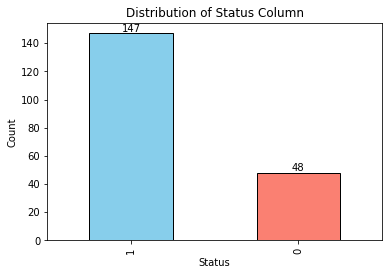

In [6]:
status_counts = data['status'].value_counts()

# Plotting the bar chart
ax = status_counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

# Adding labels and title
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Status Column')

# Annotating the bars with their counts
for i, count in enumerate(status_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()


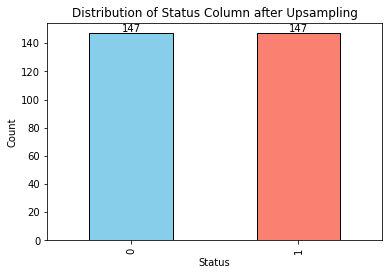

In [7]:
from sklearn.utils import resample
majority_class = data[data['status'] == 1]
minority_class = data[data['status'] == 0]

# Upsample the minority class
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine majority class with upsampled minority class
upsampled_data = pd.concat([majority_class, minority_upsampled])

# Count the occurrences of each value in the "status" column after upsampling
status_counts_upsampled = upsampled_data['status'].value_counts()

# Plotting the bar chart
ax = status_counts_upsampled.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

# Adding labels and title
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Status Column after Upsampling')

# Annotating the bars with their counts
for i, count in enumerate(status_counts_upsampled):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [9]:
X = upsampled_data.drop(columns=['status'])
y = upsampled_data['status']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7966101694915254
Precision: 0.8571428571428571
Recall: 0.75
F1 Score: 0.7999999999999999
Confusion Matrix:
[[23  4]
 [ 8 24]]


C:\Users\DELL\TejaswiniAnaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Function to train and evaluate a model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Print evaluation metrics
    print(f"Model: {model.__class__.__name__}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n")

# List of models to evaluate
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier()
]

# Evaluate each model
for model in models:
    evaluate_model(model, X_train, y_train, X_test, y_test)


C:\Users\DELL\TejaswiniAnaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.7966101694915254
Precision: 0.8571428571428571
Recall: 0.75
F1 Score: 0.7999999999999999
Confusion Matrix:
[[23  4]
 [ 8 24]]


Model: DecisionTreeClassifier
Accuracy: 0.9491525423728814
Precision: 1.0
Recall: 0.90625
F1 Score: 0.9508196721311475
Confusion Matrix:
[[27  0]
 [ 3 29]]


Model: RandomForestClassifier
Accuracy: 0.9491525423728814
Precision: 1.0
Recall: 0.90625
F1 Score: 0.9508196721311475
Confusion Matrix:
[[27  0]
 [ 3 29]]


Model: SVC
Accuracy: 0.7288135593220338
Precision: 0.7222222222222222
Recall: 0.8125
F1 Score: 0.7647058823529411
Confusion Matrix:
[[17 10]
 [ 6 26]]


Model: KNeighborsClassifier
Accuracy: 0.7966101694915254
Precision: 0.9166666666666666
Recall: 0.6875
F1 Score: 0.7857142857142857
Confusion Matrix:
[[25  2]
 [10 22]]




C:\Users\DELL\TejaswiniAnaconda\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
